##################
# Load libraries

In [1]:
source('MS0_Libraries.r')


Attaching package: ‘igraph’


The following objects are masked from ‘package:stats’:

    decompose, spectrum


The following object is masked from ‘package:base’:

    union



Attaching package: ‘MatrixGenerics’


The following objects are masked from ‘package:matrixStats’:

    colAlls, colAnyNAs, colAnys, colAvgsPerRowSet, colCollapse,
    colCounts, colCummaxs, colCummins, colCumprods, colCumsums,
    colDiffs, colIQRDiffs, colIQRs, colLogSumExps, colMadDiffs,
    colMads, colMaxs, colMeans2, colMedians, colMins, colOrderStats,
    colProds, colQuantiles, colRanges, colRanks, colSdDiffs, colSds,
    colSums2, colTabulates, colVarDiffs, colVars, colWeightedMads,
    colWeightedMeans, colWeightedMedians, colWeightedSds,
    colWeightedVars, rowAlls, rowAnyNAs, rowAnys, rowAvgsPerColSet,
    rowCollapse, rowCounts, rowCummaxs, rowCummins, rowCumprods,
    rowCumsums, rowDiffs, rowIQRDiffs, rowIQRs, rowLogSumExps,
    rowMadDiffs, rowMads, rowMaxs, rowMeans2, rowMedians, rowMins,
   

##################
# Configuration + Variables

In [6]:
data_path = '../data/current'

In [7]:
result_path = '../results/current'

In [8]:
libraries_numeric = c('0001', '0002', '0003', '0004', '0005', '0006', '0007', '0008', '0009','0010','0011', '0012', '0013', '0014')

In [9]:
libraries = c('L1','L2', 'L3', 'L4', 'L5', 'L6', 'L7', 'L8', 'L9', 'L10','L11', 'L12', 'L13', 'L14')

In [10]:
data_load = paste(data_path, "/preprocessed-data/meta-data/Mapping_Hashtag_Sample.csv", sep ='')
print(file.info(data_load)$mtim)

[1] "2021-09-02 13:17:03 CEST"


In [11]:
library_hashtag_mapping = read.csv(data_load)

In [12]:
head(library_hashtag_mapping,2) 

,library,id,name,read,pattern,sequence,feature_type,X,in_sample,display_name,group
,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<lgl>,<int>,<chr>,<chr>
1,L1,HTO_B0251,1.1,R2,5PNNNNNNNNNN(BC),GTCAACTCTTTAGCG,Antibody Capture,NA,1,1.1,TP1
2,L1,HTO_B0252,2.1,R2,5PNNNNNNNNNN(BC),TGATGGCCTATTGGG,Antibody Capture,NA,1,2.1,TP1


#######################
# Analyze + Prepare cellranger QC outputs

## Data Load

In [13]:

cellranger_qc = data.frame()

for(h in 1:length(libraries_numeric)){
    i = libraries_numeric[h]
    j = libraries[h]
    path = paste(data_path, "/preprocessed-data/pipelinerun_v21068-", i, '/cellranger/21068-',i, '/statsfiles/metrics_summary.csv' , sep = '')
    cellranger_data = read.csv(path)
    cellranger_data = cbind(i,j, cellranger_data)
    cellranger_qc = rbind(cellranger_qc, cellranger_data)
    }

In [14]:
head(cellranger_qc,2)

,i,j,Estimated.Number.of.Cells,Mean.Reads.per.Cell,Median.Genes.per.Cell,Number.of.Reads,Valid.Barcodes,Sequencing.Saturation,Q30.Bases.in.Barcode,Q30.Bases.in.RNA.Read,⋯,Antibody..Q30.Bases.in.Antibody.Read,Antibody..Q30.Bases.in.Sample.Index,Antibody..Q30.Bases.in.UMI,Antibody..Fraction.Antibody.Reads,Antibody..Fraction.Antibody.Reads.Usable,Antibody..Antibody.Reads.Usable.per.Cell,Antibody..Fraction.Reads.in.Barcodes.with.High.UMI.Counts,Antibody..Fraction.Unrecognized.Antibody,Antibody..Antibody.Reads.in.Cells,Antibody..Median.UMIs.per.Cell..summed.over.all.recognized.antibody.barcodes.
,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,⋯,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>
1,0001,L1,"20,572","26,207","1,369","539,148,058",97.6%,46.5%,95.6%,93.0%,⋯,94.8%,91.9%,95.6%,95.8%,53.2%,"1,440",0.0%,4.2%,55.8%,565
2,0002,L2,"18,667","24,245","1,339","452,592,160",97.7%,41.1%,96.0%,94.3%,⋯,95.1%,88.5%,95.6%,95.7%,52.8%,"1,464",0.0%,4.3%,55.5%,563


In [15]:
colnames(cellranger_qc)[1:2] = c('library_num', 'library')

## Transformations + Save Result

In [16]:

cellranger_qc

library_num,library,Estimated.Number.of.Cells,Mean.Reads.per.Cell,Median.Genes.per.Cell,Number.of.Reads,Valid.Barcodes,Sequencing.Saturation,Q30.Bases.in.Barcode,Q30.Bases.in.RNA.Read,⋯,Antibody..Q30.Bases.in.Antibody.Read,Antibody..Q30.Bases.in.Sample.Index,Antibody..Q30.Bases.in.UMI,Antibody..Fraction.Antibody.Reads,Antibody..Fraction.Antibody.Reads.Usable,Antibody..Antibody.Reads.Usable.per.Cell,Antibody..Fraction.Reads.in.Barcodes.with.High.UMI.Counts,Antibody..Fraction.Unrecognized.Antibody,Antibody..Antibody.Reads.in.Cells,Antibody..Median.UMIs.per.Cell..summed.over.all.recognized.antibody.barcodes.
<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,⋯,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>
0001,L1,"20,572","26,207","1,369","539,148,058",97.6%,46.5%,95.6%,93.0%,⋯,94.8%,91.9%,95.6%,95.8%,53.2%,"1,440",0.0%,4.2%,55.8%,565
0002,L2,"18,667","24,245","1,339","452,592,160",97.7%,41.1%,96.0%,94.3%,⋯,95.1%,88.5%,95.6%,95.7%,52.8%,"1,464",0.0%,4.3%,55.5%,563
0003,L3,"17,837","29,225","1,689","521,295,908",97.7%,36.3%,96.2%,95.0%,⋯,95.0%,92.8%,95.5%,95.2%,48.6%,"1,714",0.0%,4.8%,51.3%,784
0004,L4,"23,187","20,586","1,283","477,328,286",97.5%,35.3%,96.1%,94.6%,⋯,95.0%,90.4%,95.5%,95.7%,49.2%,"1,974",0.0%,4.3%,51.7%,842
0005,L5,"30,388","23,042","1,416","700,223,552",97.3%,36.8%,96.0%,93.7%,⋯,94.9%,92.9%,95.6%,95.8%,58.6%,"2,875",0.0%,4.2%,61.5%,"1,125"
0006,L6,"22,541","32,396","1,613","730,251,779",97.5%,42.2%,96.2%,94.9%,⋯,95.0%,91.9%,95.6%,95.9%,52.8%,"1,797",0.0%,4.1%,55.3%,712
0007,L7,"18,870","25,918","1,325","489,081,575",97.5%,44.0%,95.8%,94.3%,⋯,95.0%,89.8%,95.5%,95.9%,50.0%,"2,400",0.0%,4.1%,52.5%,832
0008,L8,"22,824","35,138","1,714","801,990,313",97.7%,46.2%,96.2%,94.9%,⋯,94.9%,93.4%,95.6%,95.8%,53.7%,"2,355",0.0%,4.2%,56.3%,933
0009,L9,"18,072","32,738","1,559","591,644,641",97.6%,43.3%,96.1%,94.3%,⋯,94.9%,90.9%,95.6%,95.8%,49.4%,"2,132",0.0%,4.2%,51.8%,837


In [17]:
colnames(cellranger_qc)

[1] "library_num"                                                                  
 [2] "library"                                                                      
 [3] "Estimated.Number.of.Cells"                                                    
 [4] "Mean.Reads.per.Cell"                                                          
 [5] "Median.Genes.per.Cell"                                                        
 [6] "Number.of.Reads"                                                              
 [7] "Valid.Barcodes"                                                               
 [8] "Sequencing.Saturation"                                                        
 [9] "Q30.Bases.in.Barcode"                                                         
[10] "Q30.Bases.in.RNA.Read"                                                        
[11] "Q30.Bases.in.Sample.Index"                                                    
[12] "Q30.Bases.in.UMI"                                                             
[13] "Reads.Mapped.to.Genome"                                                       
[14] "Reads.Mapped.Confidently.to.Genome"                                           
[15] "Reads.Mapped.Confidently.to.Intergenic.Regions"                               
[16] "Reads.Mapped.Confidently.to.Intronic.Regions"                                 
[17] "Reads.Mapped.Confidently.to.Exonic.Regions"                                   
[18] "Reads.Mapped.Confidently.to.Transcriptome"                                    
[19] "Reads.Mapped.Antisense.to.Gene"                                               
[20] "Fraction.Reads.in.Cells"                                                      
[21] "Total.Genes.Detected"                                                         
[22] "Median.UMI.Counts.per.Cell"                                                   
[23] "Antibody..Number.of.Reads"                                                    
[24] "Antibody..Mean.Reads.per.Cell"                                                
[25] "Antibody..Valid.Barcodes"                                                     
[26] "Antibody..Sequencing.Saturation"                                              
[27] "Antibody..Q30.Bases.in.Barcode"                                               
[28] "Antibody..Q30.Bases.in.Antibody.Read"                                         
[29] "Antibody..Q30.Bases.in.Sample.Index"                                          
[30] "Antibody..Q30.Bases.in.UMI"                                                   
[31] "Antibody..Fraction.Antibody.Reads"                                            
[32] "Antibody..Fraction.Antibody.Reads.Usable"                                     
[33] "Antibody..Antibody.Reads.Usable.per.Cell"                                     
[34] "Antibody..Fraction.Reads.in.Barcodes.with.High.UMI.Counts"                    
[35] "Antibody..Fraction.Unrecognized.Antibody"                                     
[36] "Antibody..Antibody.Reads.in.Cells"                                            
[37] "Antibody..Median.UMIs.per.Cell..summed.over.all.recognized.antibody.barcodes."

In [18]:
result_file = paste(result_path, '/A-Preprocessing/Cellranger_QC_statistics.csv', sep = '')

In [19]:
result_file

[1] "../results/current/A-Preprocessing/Cellranger_QC_statistics.csv"

In [20]:
write.csv(cellranger_qc, paste(result_path, '/A-Preprocessing/Cellranger_QC_statistics.csv', sep = ''))

In [21]:
##### Save as supplementary table for paper

In [22]:
write.csv(cellranger_qc, paste(result_path, '/Supplementary/SUPP_A2_Cellranger_QC_statistics.csv', sep = ''))

In [23]:
########## Classify different cellranger results

In [24]:
overall_statistics = c('library', 'Estimated.Number.of.Cells', 'Mean.Reads.per.Cell', 'Median.Genes.per.Cell', 'Fraction.Reads.in.Cells', 'Total.Genes.Detected', 'Median.UMI.Counts.per.Cell')

In [25]:
sequencing_statistics = c('library','Number.of.Reads','Valid.Barcodes','Sequencing.Saturation','Q30.Bases.in.Barcode','Q30.Bases.in.RNA.Read','Q30.Bases.in.Sample.Index','Q30.Bases.in.UMI')

In [26]:
antibody_sequencing_statistics = c('library','Antibody..Number.of.Reads','Antibody..Mean.Reads.per.Cell','Antibody..Valid.Barcodes','Antibody..Sequencing.Saturation','Antibody..Q30.Bases.in.Barcode','Antibody..Q30.Bases.in.Antibody.Read','Antibody..Q30.Bases.in.Sample.Index','Antibody..Q30.Bases.in.UMI')

In [27]:
antibody_application_statistics = c('library', 'Antibody..Fraction.Antibody.Reads','Antibody..Fraction.Antibody.Reads.Usable','Antibody..Antibody.Reads.Usable.per.Cell','Antibody..Fraction.Reads.in.Barcodes.with.High.UMI.Counts','Antibody..Fraction.Unrecognized.Antibody','Antibody..Antibody.Reads.in.Cells','Antibody..Median.UMIs.per.Cell..summed.over.all.recognized.antibody.barcodes.')

In [28]:
mapping_statistics = c('library','Reads.Mapped.to.Genome','Reads.Mapped.Confidently.to.Genome','Reads.Mapped.Confidently.to.Intergenic.Regions','Reads.Mapped.Confidently.to.Intronic.Regions','Reads.Mapped.Confidently.to.Exonic.Regions','Reads.Mapped.Confidently.to.Transcriptome','Reads.Mapped.Antisense.to.Gene')

In [29]:
##### Generate Output tables

In [30]:
cellranger_overall_statistics = cellranger_qc[,overall_statistics]

In [31]:
cellranger_overall_statistics

library,Estimated.Number.of.Cells,Mean.Reads.per.Cell,Median.Genes.per.Cell,Fraction.Reads.in.Cells,Total.Genes.Detected,Median.UMI.Counts.per.Cell
<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>
L1,"20,572","26,207","1,369",91.1%,"24,253","4,451"
L2,"18,667","24,245","1,339",85.7%,"24,083","4,203"
L3,"17,837","29,225","1,689",79.7%,"24,322","5,070"
L4,"23,187","20,586","1,283",86.3%,"24,219","3,908"
L5,"30,388","23,042","1,416",82.1%,"24,971","3,996"
L6,"22,541","32,396","1,613",77.4%,"24,841","4,899"
L7,"18,870","25,918","1,325",78.5%,"24,032","4,001"
L8,"22,824","35,138","1,714",80.1%,"24,750","5,917"
L9,"18,072","32,738","1,559",83.7%,"24,555","5,276"


In [32]:
write.csv(cellranger_overall_statistics, paste(result_path, '/A-Preprocessing/Cellranger_QC_overall_statistics.csv', sep = ''))

In [33]:
cellranger_sequencing_statistics = cellranger_qc[,sequencing_statistics]

In [34]:
cellranger_sequencing_statistics

library,Number.of.Reads,Valid.Barcodes,Sequencing.Saturation,Q30.Bases.in.Barcode,Q30.Bases.in.RNA.Read,Q30.Bases.in.Sample.Index,Q30.Bases.in.UMI
<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>
L1,"539,148,058",97.6%,46.5%,95.6%,93.0%,94.5%,95.1%
L2,"452,592,160",97.7%,41.1%,96.0%,94.3%,90.5%,95.6%
L3,"521,295,908",97.7%,36.3%,96.2%,95.0%,93.6%,96.0%
L4,"477,328,286",97.5%,35.3%,96.1%,94.6%,93.9%,95.9%
L5,"700,223,552",97.3%,36.8%,96.0%,93.7%,92.6%,95.7%
L6,"730,251,779",97.5%,42.2%,96.2%,94.9%,92.4%,96.0%
L7,"489,081,575",97.5%,44.0%,95.8%,94.3%,89.7%,95.5%
L8,"801,990,313",97.7%,46.2%,96.2%,94.9%,93.9%,95.9%
L9,"591,644,641",97.6%,43.3%,96.1%,94.3%,95.0%,95.9%


In [35]:
write.csv(cellranger_sequencing_statistics, paste(result_path, '/A-Preprocessing/Cellranger_QC_sequencing_statistics.csv', sep = ''))

In [36]:
cellranger_antibody_sequencing_statistics = cellranger_qc[,antibody_sequencing_statistics ]

In [37]:
cellranger_antibody_sequencing_statistics

library,Antibody..Number.of.Reads,Antibody..Mean.Reads.per.Cell,Antibody..Valid.Barcodes,Antibody..Sequencing.Saturation,Antibody..Q30.Bases.in.Barcode,Antibody..Q30.Bases.in.Antibody.Read,Antibody..Q30.Bases.in.Sample.Index,Antibody..Q30.Bases.in.UMI
<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>
L1,"55,725,398","2,708",99.3%,36.5%,95.6%,94.8%,91.9%,95.6%
L2,"51,790,214","2,774",99.3%,32.2%,95.6%,95.1%,88.5%,95.6%
L3,"62,951,480","3,529",99.2%,24.5%,95.6%,95.0%,92.8%,95.5%
L4,"92,950,548","4,008",99.3%,39.0%,95.6%,95.0%,90.4%,95.5%
L5,"149,045,319","4,904",99.3%,36.3%,95.6%,94.9%,92.9%,95.6%
L6,"76,741,889","3,404",99.3%,28.8%,95.6%,95.0%,91.9%,95.6%
L7,"90,511,450","4,796",99.3%,33.9%,95.6%,95.0%,89.8%,95.5%
L8,"100,155,968","4,388",99.3%,37.9%,95.6%,94.9%,93.4%,95.6%
L9,"78,072,517","4,320",99.2%,32.7%,95.6%,94.9%,90.9%,95.6%


In [38]:
write.csv(cellranger_antibody_sequencing_statistics, paste(result_path, '/A-Preprocessing/Cellranger_QC_antibody_sequencing_statistics.csv', sep =''))

In [39]:
cellranger_antibody_application_statistics = cellranger_qc[,antibody_application_statistics]

In [40]:
cellranger_antibody_application_statistics

library,Antibody..Fraction.Antibody.Reads,Antibody..Fraction.Antibody.Reads.Usable,Antibody..Antibody.Reads.Usable.per.Cell,Antibody..Fraction.Reads.in.Barcodes.with.High.UMI.Counts,Antibody..Fraction.Unrecognized.Antibody,Antibody..Antibody.Reads.in.Cells,Antibody..Median.UMIs.per.Cell..summed.over.all.recognized.antibody.barcodes.
<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>
L1,95.8%,53.2%,"1,440",0.0%,4.2%,55.8%,565
L2,95.7%,52.8%,"1,464",0.0%,4.3%,55.5%,563
L3,95.2%,48.6%,"1,714",0.0%,4.8%,51.3%,784
L4,95.7%,49.2%,"1,974",0.0%,4.3%,51.7%,842
L5,95.8%,58.6%,"2,875",0.0%,4.2%,61.5%,"1,125"
L6,95.9%,52.8%,"1,797",0.0%,4.1%,55.3%,712
L7,95.9%,50.0%,"2,400",0.0%,4.1%,52.5%,832
L8,95.8%,53.7%,"2,355",0.0%,4.2%,56.3%,933
L9,95.8%,49.4%,"2,132",0.0%,4.2%,51.8%,837


In [41]:
write.csv(cellranger_antibody_application_statistics, paste(result_path, '/A-Preprocessing/Cellranger_QC_antibody_application_statistics.csv', sep =''))

In [42]:
cellranger_mapping_statistics= cellranger_qc[,mapping_statistics ]

In [43]:
cellranger_mapping_statistics

library,Reads.Mapped.to.Genome,Reads.Mapped.Confidently.to.Genome,Reads.Mapped.Confidently.to.Intergenic.Regions,Reads.Mapped.Confidently.to.Intronic.Regions,Reads.Mapped.Confidently.to.Exonic.Regions,Reads.Mapped.Confidently.to.Transcriptome,Reads.Mapped.Antisense.to.Gene
<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>
L1,95.6%,90.4%,5.8%,32.7%,52.0%,47.4%,2.4%
L2,96.4%,91.1%,6.3%,31.5%,53.3%,48.9%,2.3%
L3,96.1%,92.1%,5.3%,34.3%,52.6%,48.2%,2.3%
L4,96.1%,91.0%,6.1%,32.6%,52.3%,47.7%,2.4%
L5,96.1%,91.7%,5.4%,35.3%,51.0%,46.3%,2.5%
L6,96.5%,92.7%,5.5%,34.9%,52.3%,47.4%,2.7%
L7,96.6%,92.7%,5.2%,32.9%,54.6%,49.8%,2.7%
L8,96.0%,90.3%,5.2%,26.4%,58.6%,54.1%,2.2%
L9,95.9%,90.8%,6.0%,31.5%,53.2%,48.6%,2.3%


In [44]:
write.csv(cellranger_mapping_statistics, paste(result_path, '/A-Preprocessing/Cellranger_QC_mapping_statistics.csv', sep = ''))

###################
# Analyze read distributions


## Data Load and Transformation

In [47]:
protein_list = list()

In [48]:
##### load in all the protein datasets
for (i in libraries) {
    csv_name = paste(data_path, "/analysis/A/A1_", i, "_Hashtags_Barcodes_Matrix_Final.csv", sep = '')
    protein_list[[i]] =  read.csv(csv_name)
    print(file.info(csv_name)$mtime)
    }
    

[1] "2023-01-20 09:54:17 CET"
[1] "2023-01-20 09:54:17 CET"
[1] "2023-01-20 09:54:17 CET"
[1] "2023-01-20 09:54:17 CET"
[1] "2023-01-20 09:54:18 CET"
[1] "2023-01-20 09:54:18 CET"
[1] "2023-01-20 09:54:18 CET"
[1] "2023-01-20 09:54:18 CET"
[1] "2023-01-20 09:54:18 CET"
[1] "2023-01-20 09:54:18 CET"
[1] "2023-01-20 09:54:18 CET"
[1] "2023-01-20 09:54:18 CET"
[1] "2023-01-20 09:54:19 CET"
[1] "2023-01-20 09:54:19 CET"


In [49]:
### Test whether operation was successful
head(protein_list[['L1']],2)

,X,X1.1,X2.1,S3,X4.1,X5.1,X6.1,X7.1,X8.1,X9.1,X10.1
,<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
1,AAACCCAAGTAGGAAG-1,128,14,0,29,29,0,6,198,10,0
2,AAACCCAAGTAGGGTC-1,11,20,0,34,30,0,9,12,110,0


In [50]:
##### adapt the loaded data/ modifiy column names
for (i in libraries) {
    row.names(protein_list[[i]]) = protein_list[[i]]$X
    protein_list[[i]] = protein_list[[i]][,-1]
    colnames(protein_list[[i]]) = str_replace(colnames(protein_list[[i]]), 'X', '')
    }


In [51]:
### Test whether operation was successful
head(protein_list[['L1']],2)

,1.1,2.1,S3,4.1,5.1,6.1,7.1,8.1,9.1,10.1
,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
AAACCCAAGTAGGAAG-1,128,14,0,29,29,0,6,198,10,0
AAACCCAAGTAGGGTC-1,11,20,0,34,30,0,9,12,110,0


In [52]:
###### Check out read distribution per library and hashtag/sample (amount of counts)

for (i in libraries) {
    print(i)
    print(colSums(protein_list[[i]]))
    }


[1] "L1"
    1.1     2.1      S3     4.1     5.1     6.1     7.1     8.1     9.1    10.1 
1713835 3452264     714 4216158 2261764    2851 1772914 1918037 3586258    6943 
[1] "L2"
   12.1    13.1    14.1    15.1    16.1    17.1    18.1    19.1 
 950554 2817272 1964637 1921131 5258389 1295179 2296439 2138804 
[1] "L3"
   21.1    22.1    23.1    25.1    26.1    27.1     6.1 
5196670 1763956 1943570 2819346 8571022 2655574  362553 
[1] "L4"
     S1     2.2     3.2     4.2      S5     6.2      S7     8.2     9.2    10.2 
    397 1043306 4355149 2605011    2912 5651165   47729 7548288 2847885 4091614 
[1] "L5"
    11.2     12.2     13.2     14.2     15.2     16.2      7.2     18.2 
 6053285  8828243  3985388 11173993  3696992  8827511  4866329  6945186 
    19.2     20.2 
 1358708    44528 
[1] "L6"
   21.2    22.2    23.2    24.2    25.2    26.2    27.2    28.2      S9    13.2 
 749123 1674499 1957054 2864199 2406633 9703258 4369016 1848605    9627 3356677 
[1] "L7"
   11.3     2.3     3.3

In [53]:
########## Convert read distribution to a dataframe

read_distribution = data.frame()

for (i in libraries) {
    data = cbind(i, names(colSums(protein_list[[i]])), colSums(protein_list[[i]]) )
    read_distribution= rbind(read_distribution,data)
    }

names(read_distribution) = c('library', 'name', 'amount_reads')

head(read_distribution)


,library,name,amount_reads
,<chr>,<chr>,<chr>
1.1,L1,1.1,1713835
2.1,L1,2.1,3452264
S3,L1,S3,714
4.1,L1,4.1,4216158
5.1,L1,5.1,2261764
6.1,L1,6.1,2851


In [54]:
library_hashtag_mapping$name = str_replace(library_hashtag_mapping$name, '-', '\\.')

In [55]:
library_hashtag_mapping$name = str_replace(library_hashtag_mapping$name, '-', '\\.')

In [56]:
######### Joins indicator of valid sample

In [57]:
read_distribution_complete = merge(read_distribution, library_hashtag_mapping)
read_distribution_complete$amount_reads = as.numeric(read_distribution_complete$amount_reads)

In [58]:
head(read_distribution_complete,2)

,library,name,amount_reads,id,read,pattern,sequence,feature_type,X,in_sample,display_name,group
,<chr>,<chr>,<dbl>,<chr>,<chr>,<chr>,<chr>,<chr>,<lgl>,<int>,<chr>,<chr>
1,L1,1.1,1713835,HTO_B0251,R2,5PNNNNNNNNNN(BC),GTCAACTCTTTAGCG,Antibody Capture,NA,1,1.1,TP1
2,L1,10.1,6943,HTO_B0260,R2,5PNNNNNNNNNN(BC),ATTGACCCGCGTTAG,Antibody Capture,NA,0,10.1,TP1


In [59]:
summary(read_distribution_complete,2)

   library              name            amount_reads           id           
 Length:135         Length:135         Min.   :     397   Length:135        
 Class :character   Class :character   1st Qu.: 1616036   Class :character  
 Mode  :character   Mode  :character   Median : 2590522   Mode  :character  
                                       Mean   : 3119978                     
                                       3rd Qu.: 3970258                     
                                       Max.   :13847098                     
     read             pattern            sequence         feature_type      
 Length:135         Length:135         Length:135         Length:135        
 Class :character   Class :character   Class :character   Class :character  
 Mode  :character   Mode  :character   Mode  :character   Mode  :character  
                                                                            
                                                                            

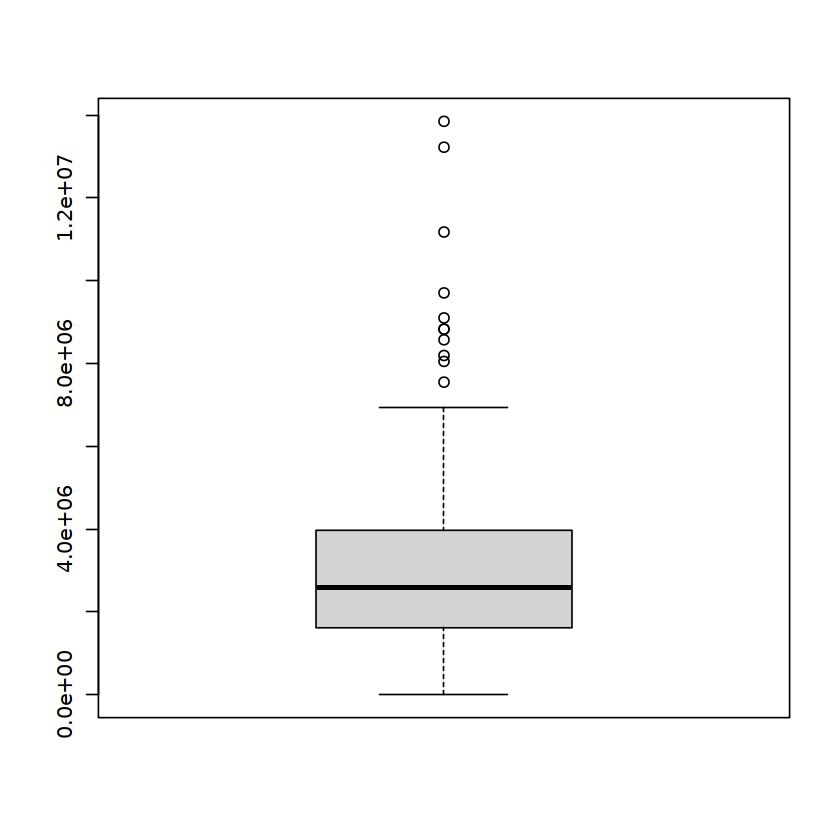

In [60]:
boxplot(read_distribution_complete$amount_reads)

In [61]:
nrow(read_distribution)      # compare whether join worked; should be same amount of rows

[1] 135

In [62]:
nrow(read_distribution_complete)

[1] 135

## Save the read distribution as csv

In [63]:
write.csv(read_distribution_complete, paste(result_path, '/A-Preprocessing/Reads_per_Hashtag.csv', sep = ''))

## Plot the read count distribution

In [64]:
read_distribution_complete$Sample_Library= paste(read_distribution_complete$library, '_', read_distribution_complete$name, '_', read_distribution_complete$id, sep='')

In [65]:
read_distribution_complete$amount_reads = as.numeric(read_distribution_complete$amount_reads)

In [66]:
read_distribution_complete$in_sample = as.factor(read_distribution_complete$in_sample)

In [67]:
options(repr.plot.width=20, repr.plot.height=10)

In [68]:
p1<-ggplot(data= read_distribution_complete[read_distribution_complete$library %in% libraries[1:7],] , aes(x=Sample_Library, y=amount_reads, color = in_sample, fill = library)) +
  geom_bar(stat="identity") + coord_flip() + scale_fill_brewer(palette="Set3") + scale_color_manual(values = c('#C0392B','#17202A'))

In [69]:
p2<-ggplot(data= read_distribution_complete[read_distribution_complete$library %in% libraries[1:7],] , aes(x=Sample_Library, y=amount_reads, color = in_sample, fill = id)) +
  geom_bar(stat="identity") + coord_flip() + scale_fill_brewer(palette="Set3") + scale_color_manual(values = c('#C0392B','#17202A'))

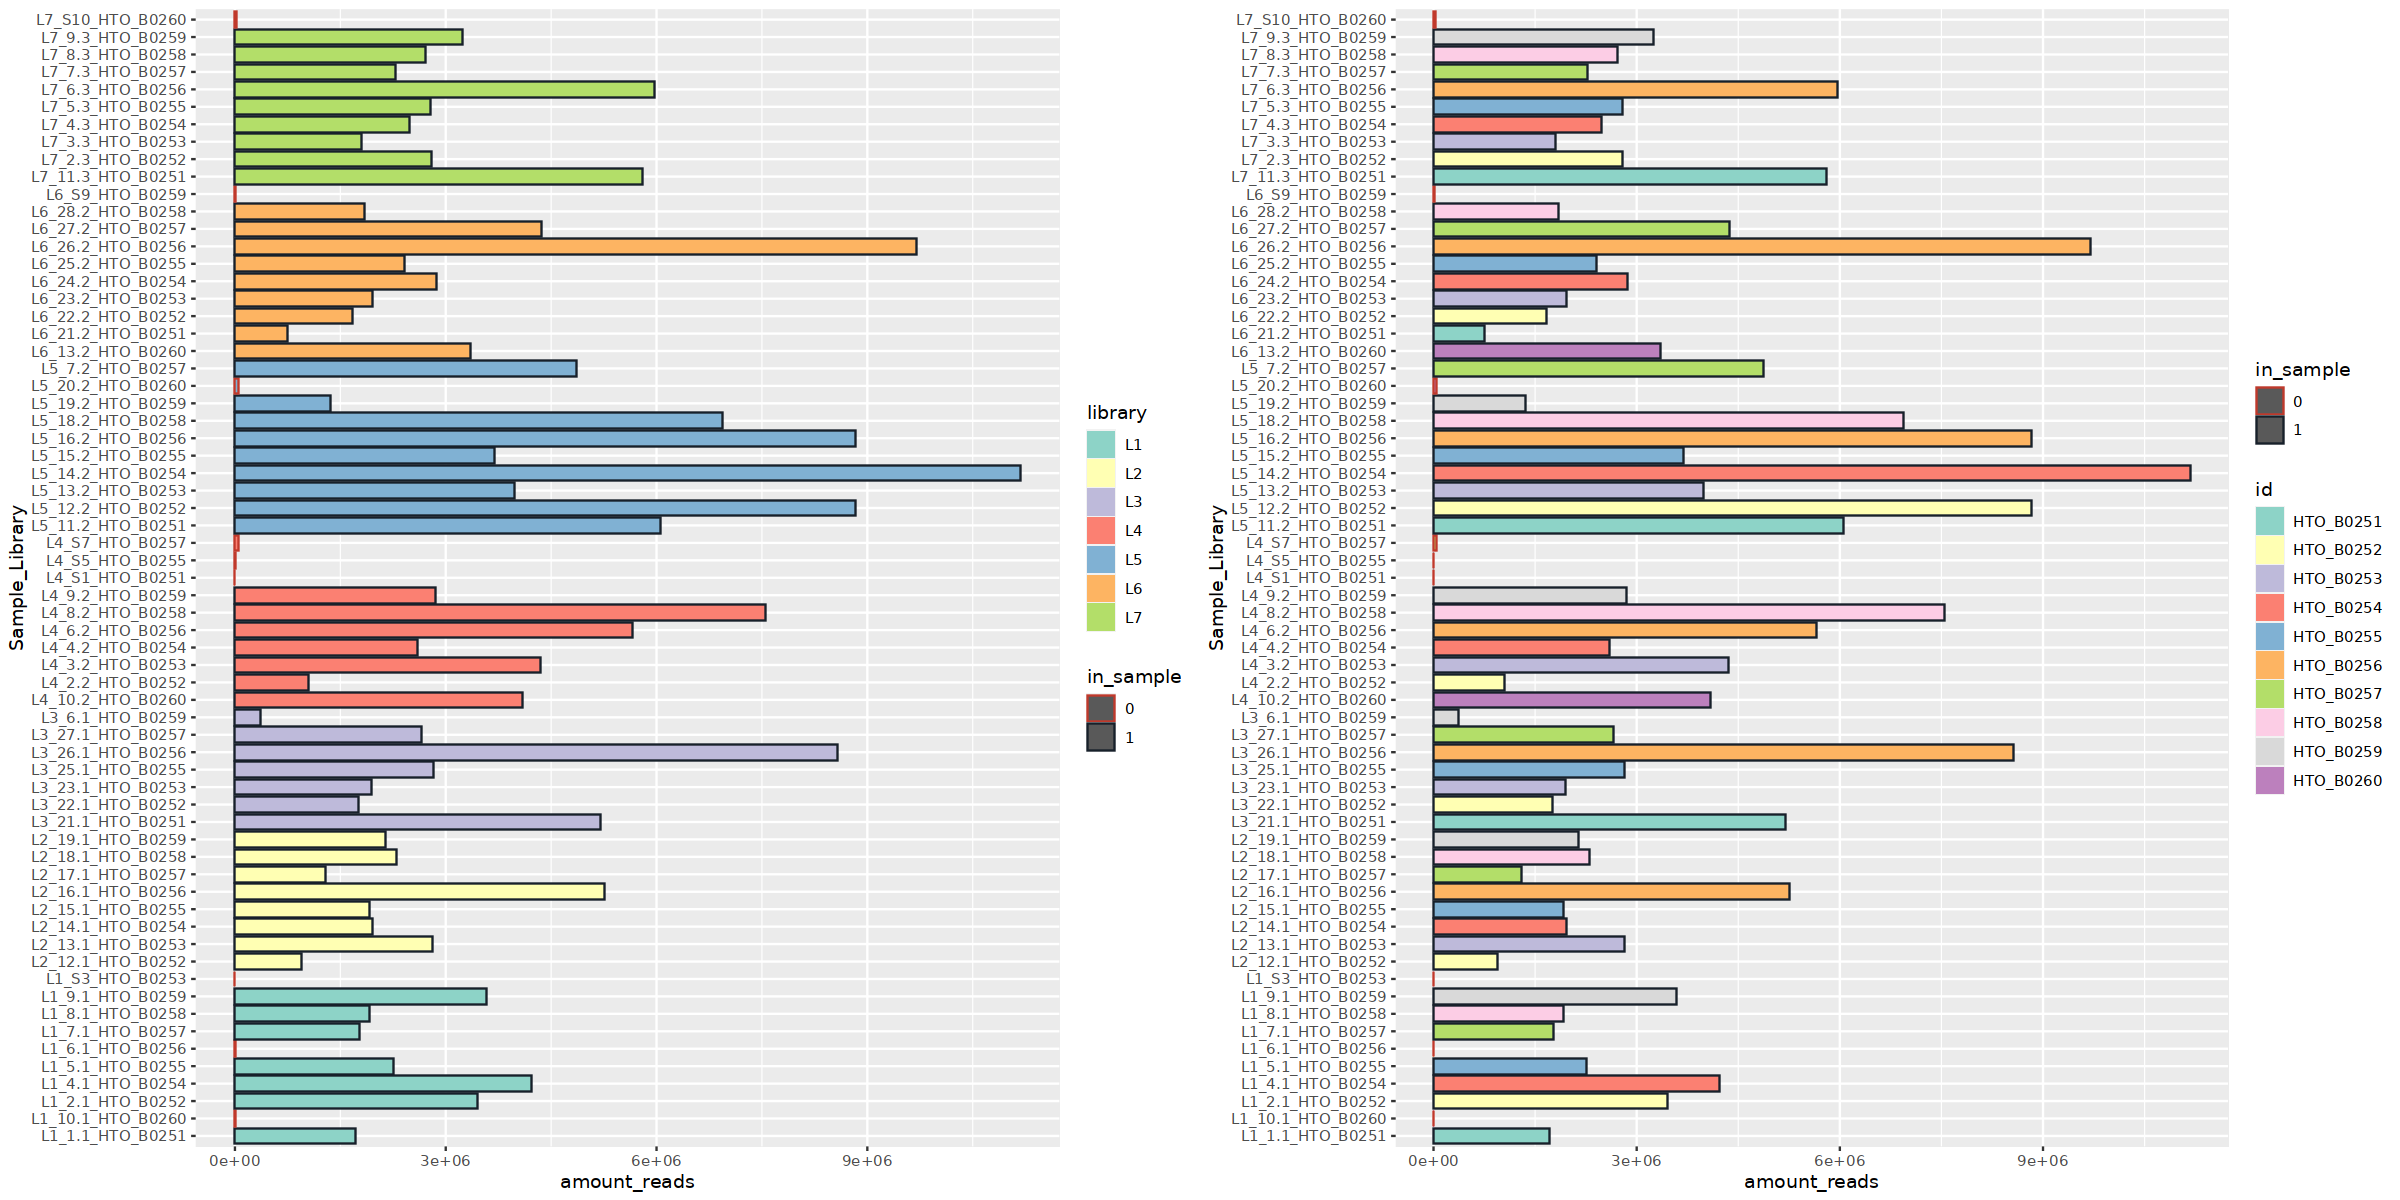

In [70]:
grid.arrange(p1, p2, ncol=2, nrow = 1)  

In [71]:
p1<-ggplot(data= read_distribution_complete[read_distribution_complete$library %in% libraries[8:14],] , aes(x=Sample_Library, y=amount_reads, color = in_sample, fill = library)) +
  geom_bar(stat="identity") + coord_flip() + scale_fill_brewer(palette="Set3") + scale_color_manual(values = c('#C0392B','#17202A'))

In [72]:
p2<-ggplot(data= read_distribution_complete[read_distribution_complete$library %in% libraries[8:14],] , aes(x=Sample_Library, y=amount_reads, color = in_sample, fill = id)) +
  geom_bar(stat="identity") + coord_flip() + scale_fill_brewer(palette="Set3") + scale_color_manual(values = c('#C0392B','#17202A'))

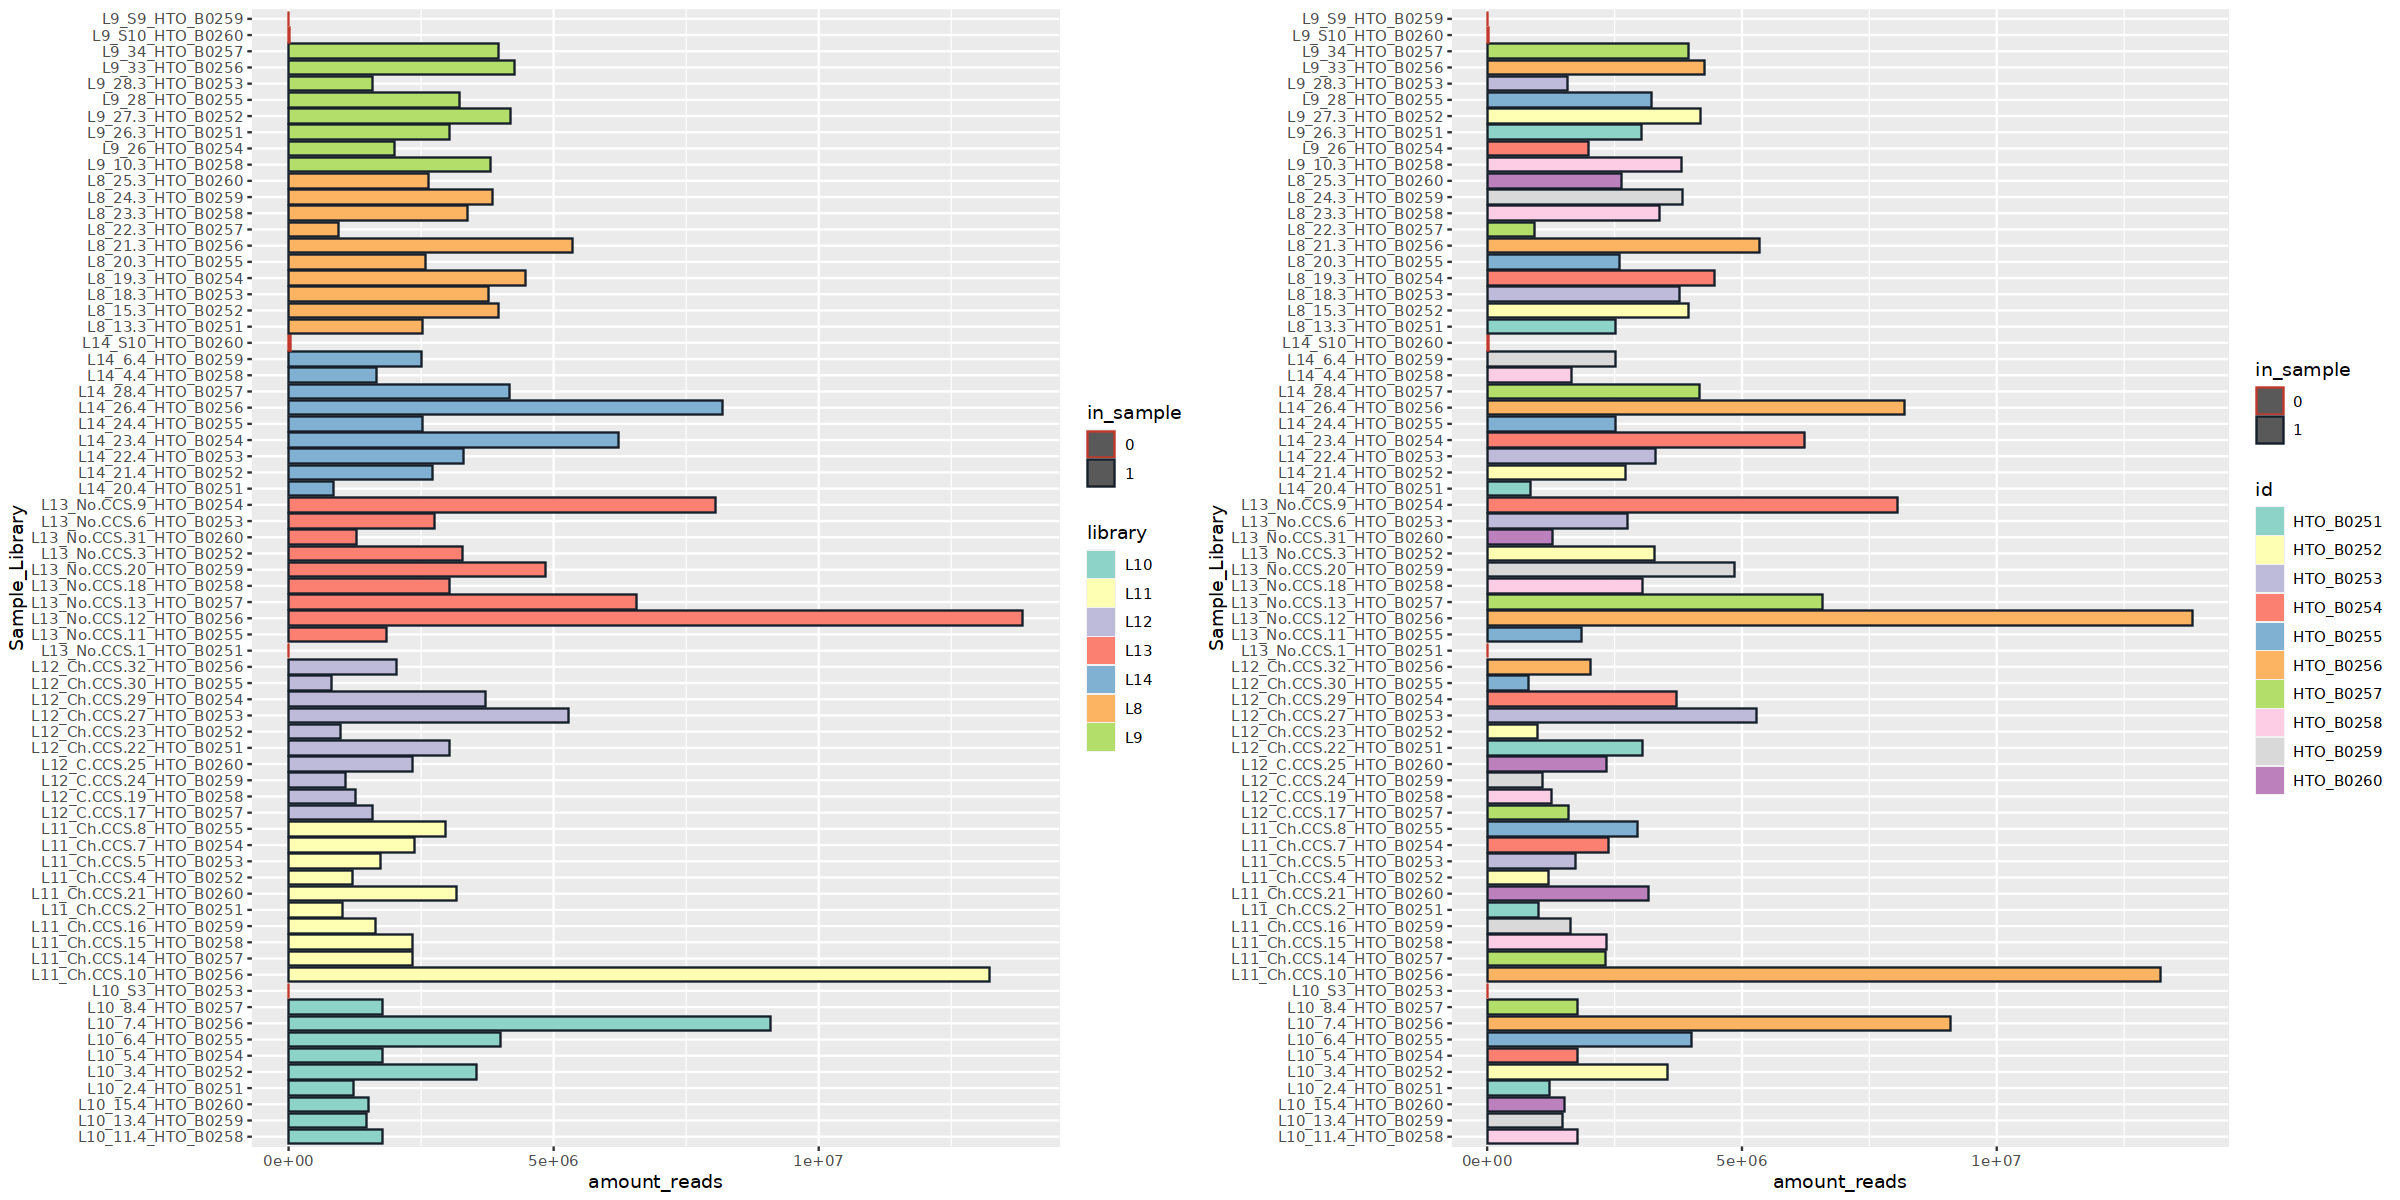

In [73]:
grid.arrange(p1, p2, ncol=2, nrow = 1)  

In [74]:
head(read_distribution_complete)

,library,name,amount_reads,id,read,pattern,sequence,feature_type,X,in_sample,display_name,group,Sample_Library
,<chr>,<chr>,<dbl>,<chr>,<chr>,<chr>,<chr>,<chr>,<lgl>,<fct>,<chr>,<chr>,<chr>
1,L1,1.1,1713835,HTO_B0251,R2,5PNNNNNNNNNN(BC),GTCAACTCTTTAGCG,Antibody Capture,NA,1,1.1,TP1,L1_1.1_HTO_B0251
2,L1,10.1,6943,HTO_B0260,R2,5PNNNNNNNNNN(BC),ATTGACCCGCGTTAG,Antibody Capture,NA,0,10.1,TP1,L1_10.1_HTO_B0260
3,L1,2.1,3452264,HTO_B0252,R2,5PNNNNNNNNNN(BC),TGATGGCCTATTGGG,Antibody Capture,NA,1,2.1,TP1,L1_2.1_HTO_B0252
4,L1,4.1,4216158,HTO_B0254,R2,5PNNNNNNNNNN(BC),AGTAAGTTCAGCGTA,Antibody Capture,NA,1,4.1,TP1,L1_4.1_HTO_B0254
5,L1,5.1,2261764,HTO_B0255,R2,5PNNNNNNNNNN(BC),AAGTATCGTTTCGCA,Antibody Capture,NA,1,5.1,TP1,L1_5.1_HTO_B0255
6,L1,6.1,2851,HTO_B0256,R2,5PNNNNNNNNNN(BC),GGTTGCCAGATGTCA,Antibody Capture,NA,0,6.1,TP1,L1_6.1_HTO_B0256


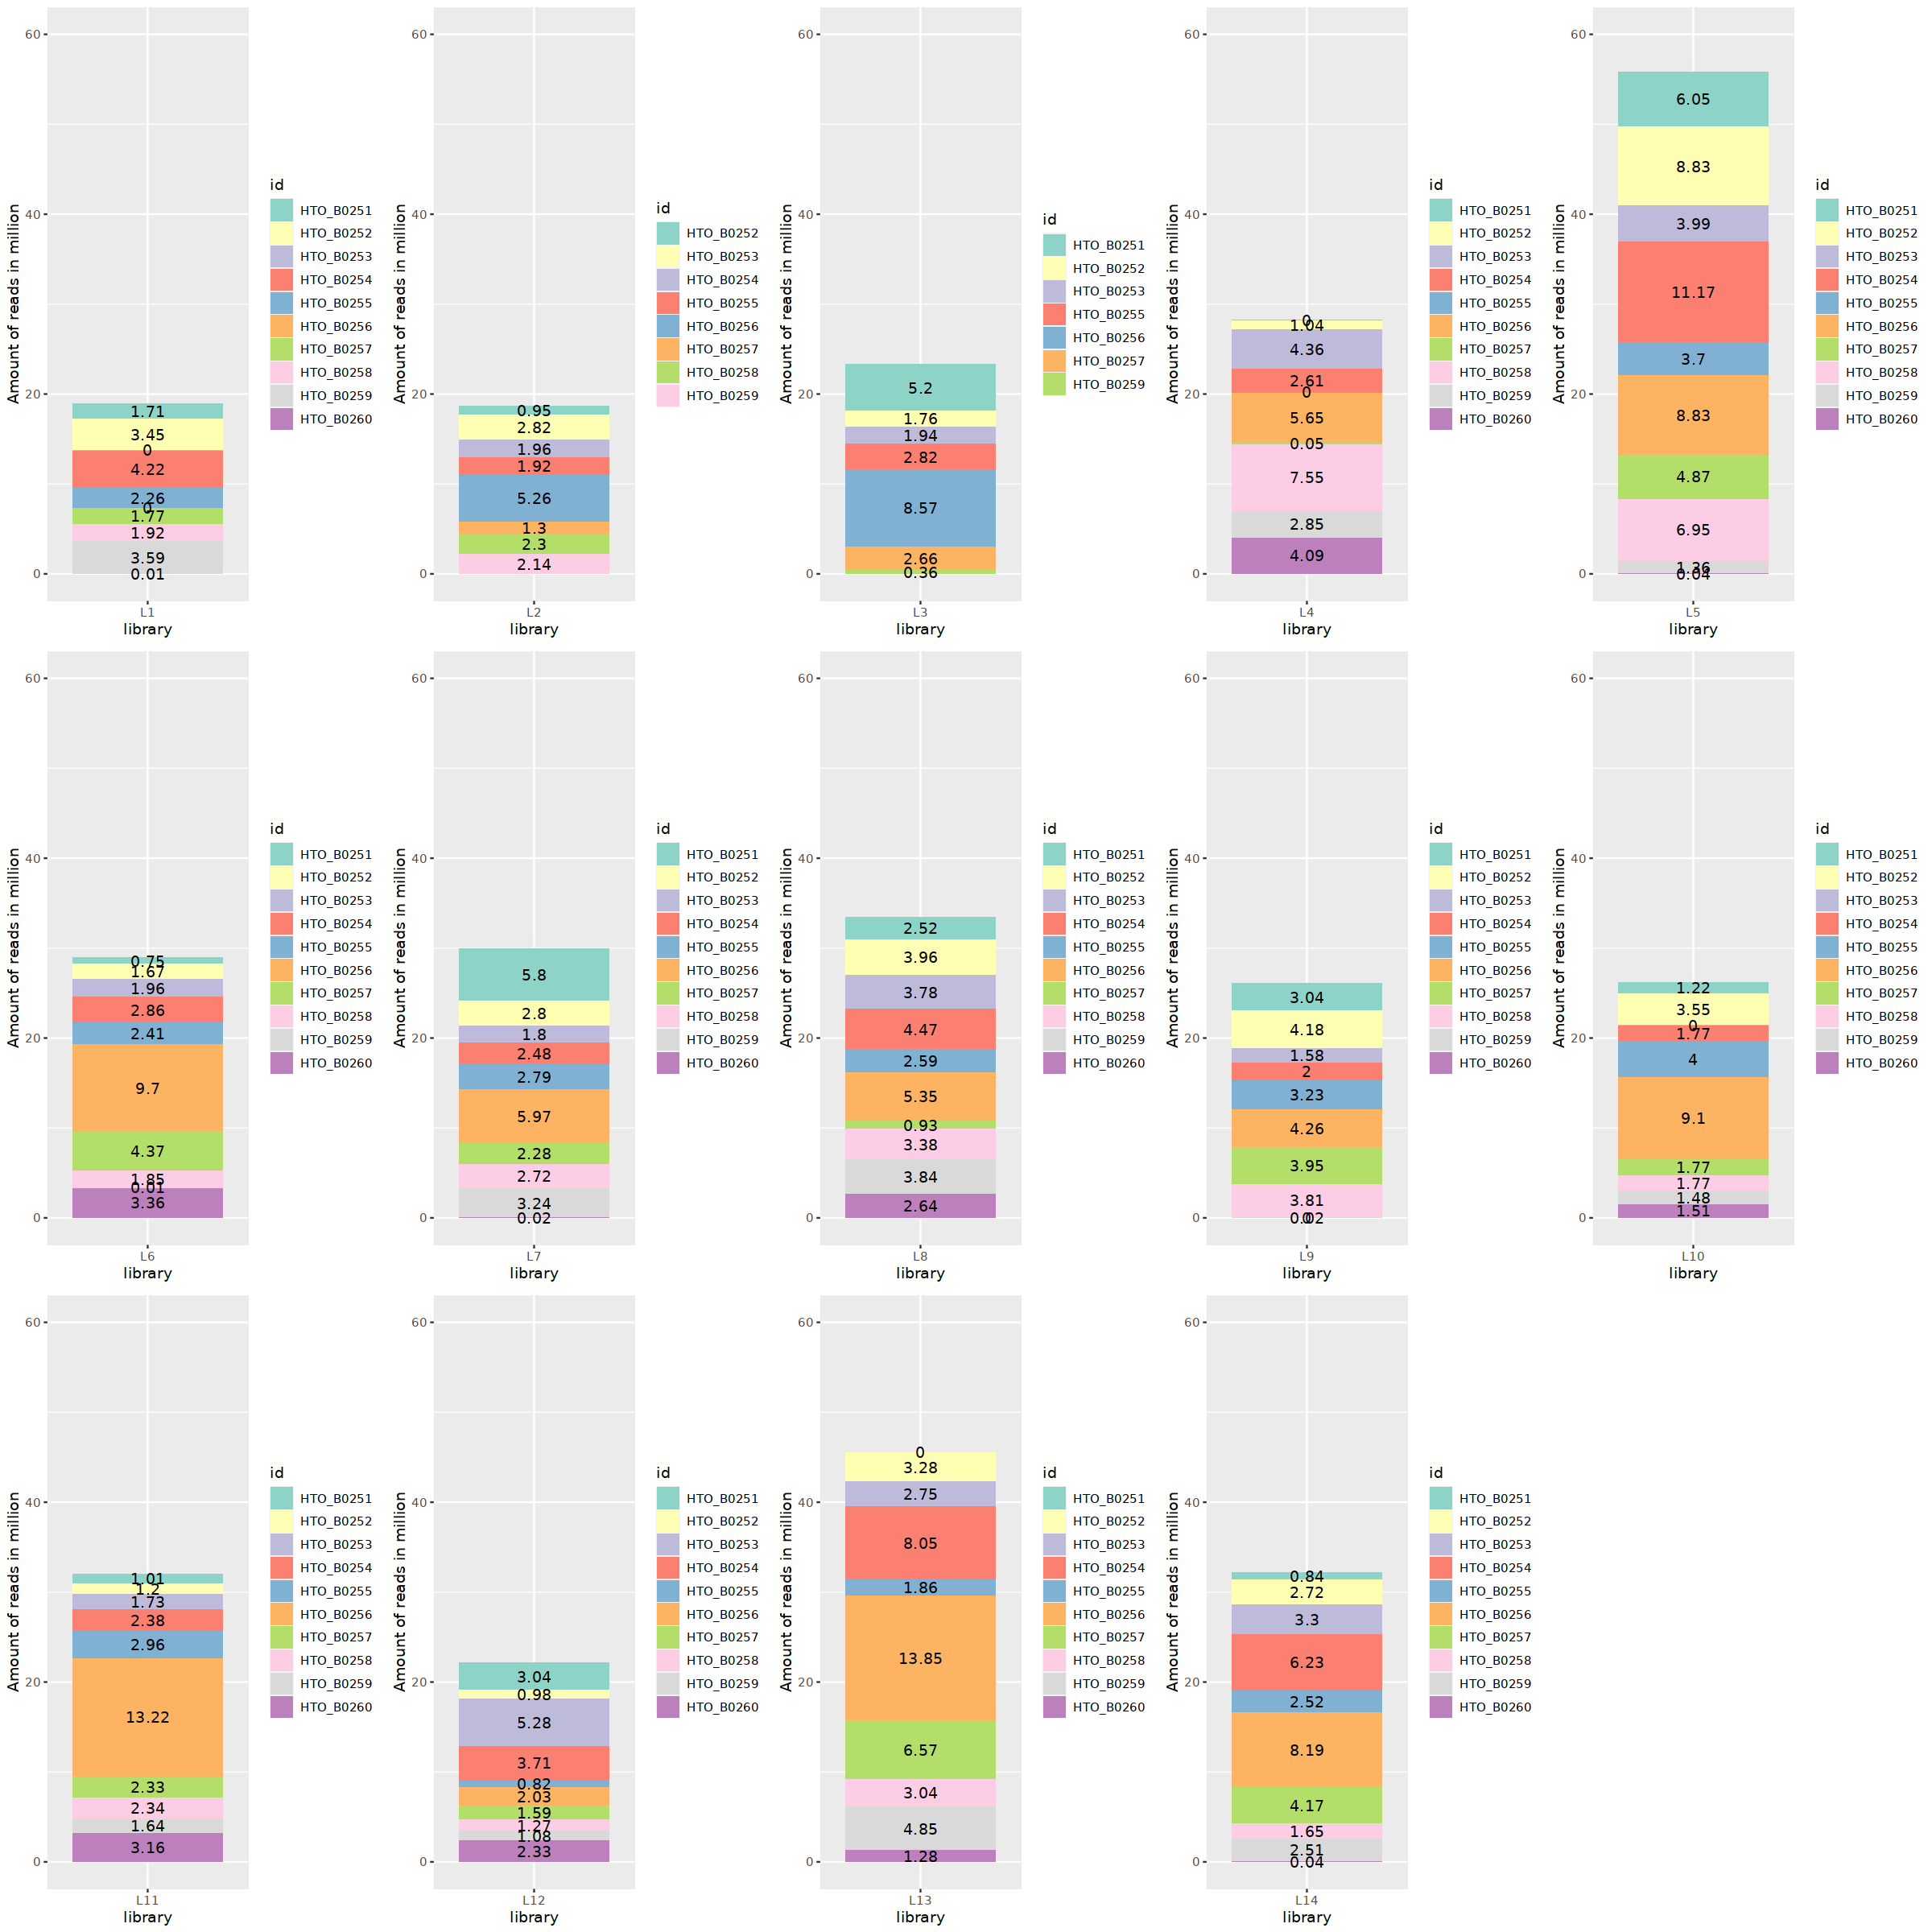

In [75]:
################# as stacked bar chart for each hashtag

read_distribution_complete$amount_reads_in_m = round(read_distribution_complete$amount_reads/1000000,2)

plot_list = list()


for(i in libraries){
    plot_list[[i]] = ggplot(read_distribution_complete[read_distribution_complete$library==i,], aes(fill=id, y=amount_reads_in_m, x=library, order=library, label = amount_reads_in_m)) + geom_bar(position="stack", stat="identity") + geom_text( size = 4, position = position_stack(vjust = 0.5)) +scale_fill_brewer(palette = "Set3") + ylim(0, 60)+ ylab ('Amount of reads in million')
    }
options(repr.plot.width=20, repr.plot.height=20)
grid.arrange(plot_list[[1]], plot_list[[2]],plot_list[[3]],plot_list[[4]],plot_list[[5]],plot_list[[6]],plot_list[[7]],plot_list[[8]], plot_list[[9]],plot_list[[10]],plot_list[[11]],plot_list[[12]],plot_list[[13]], plot_list[[14]], ncol=5, nrow = 3) 


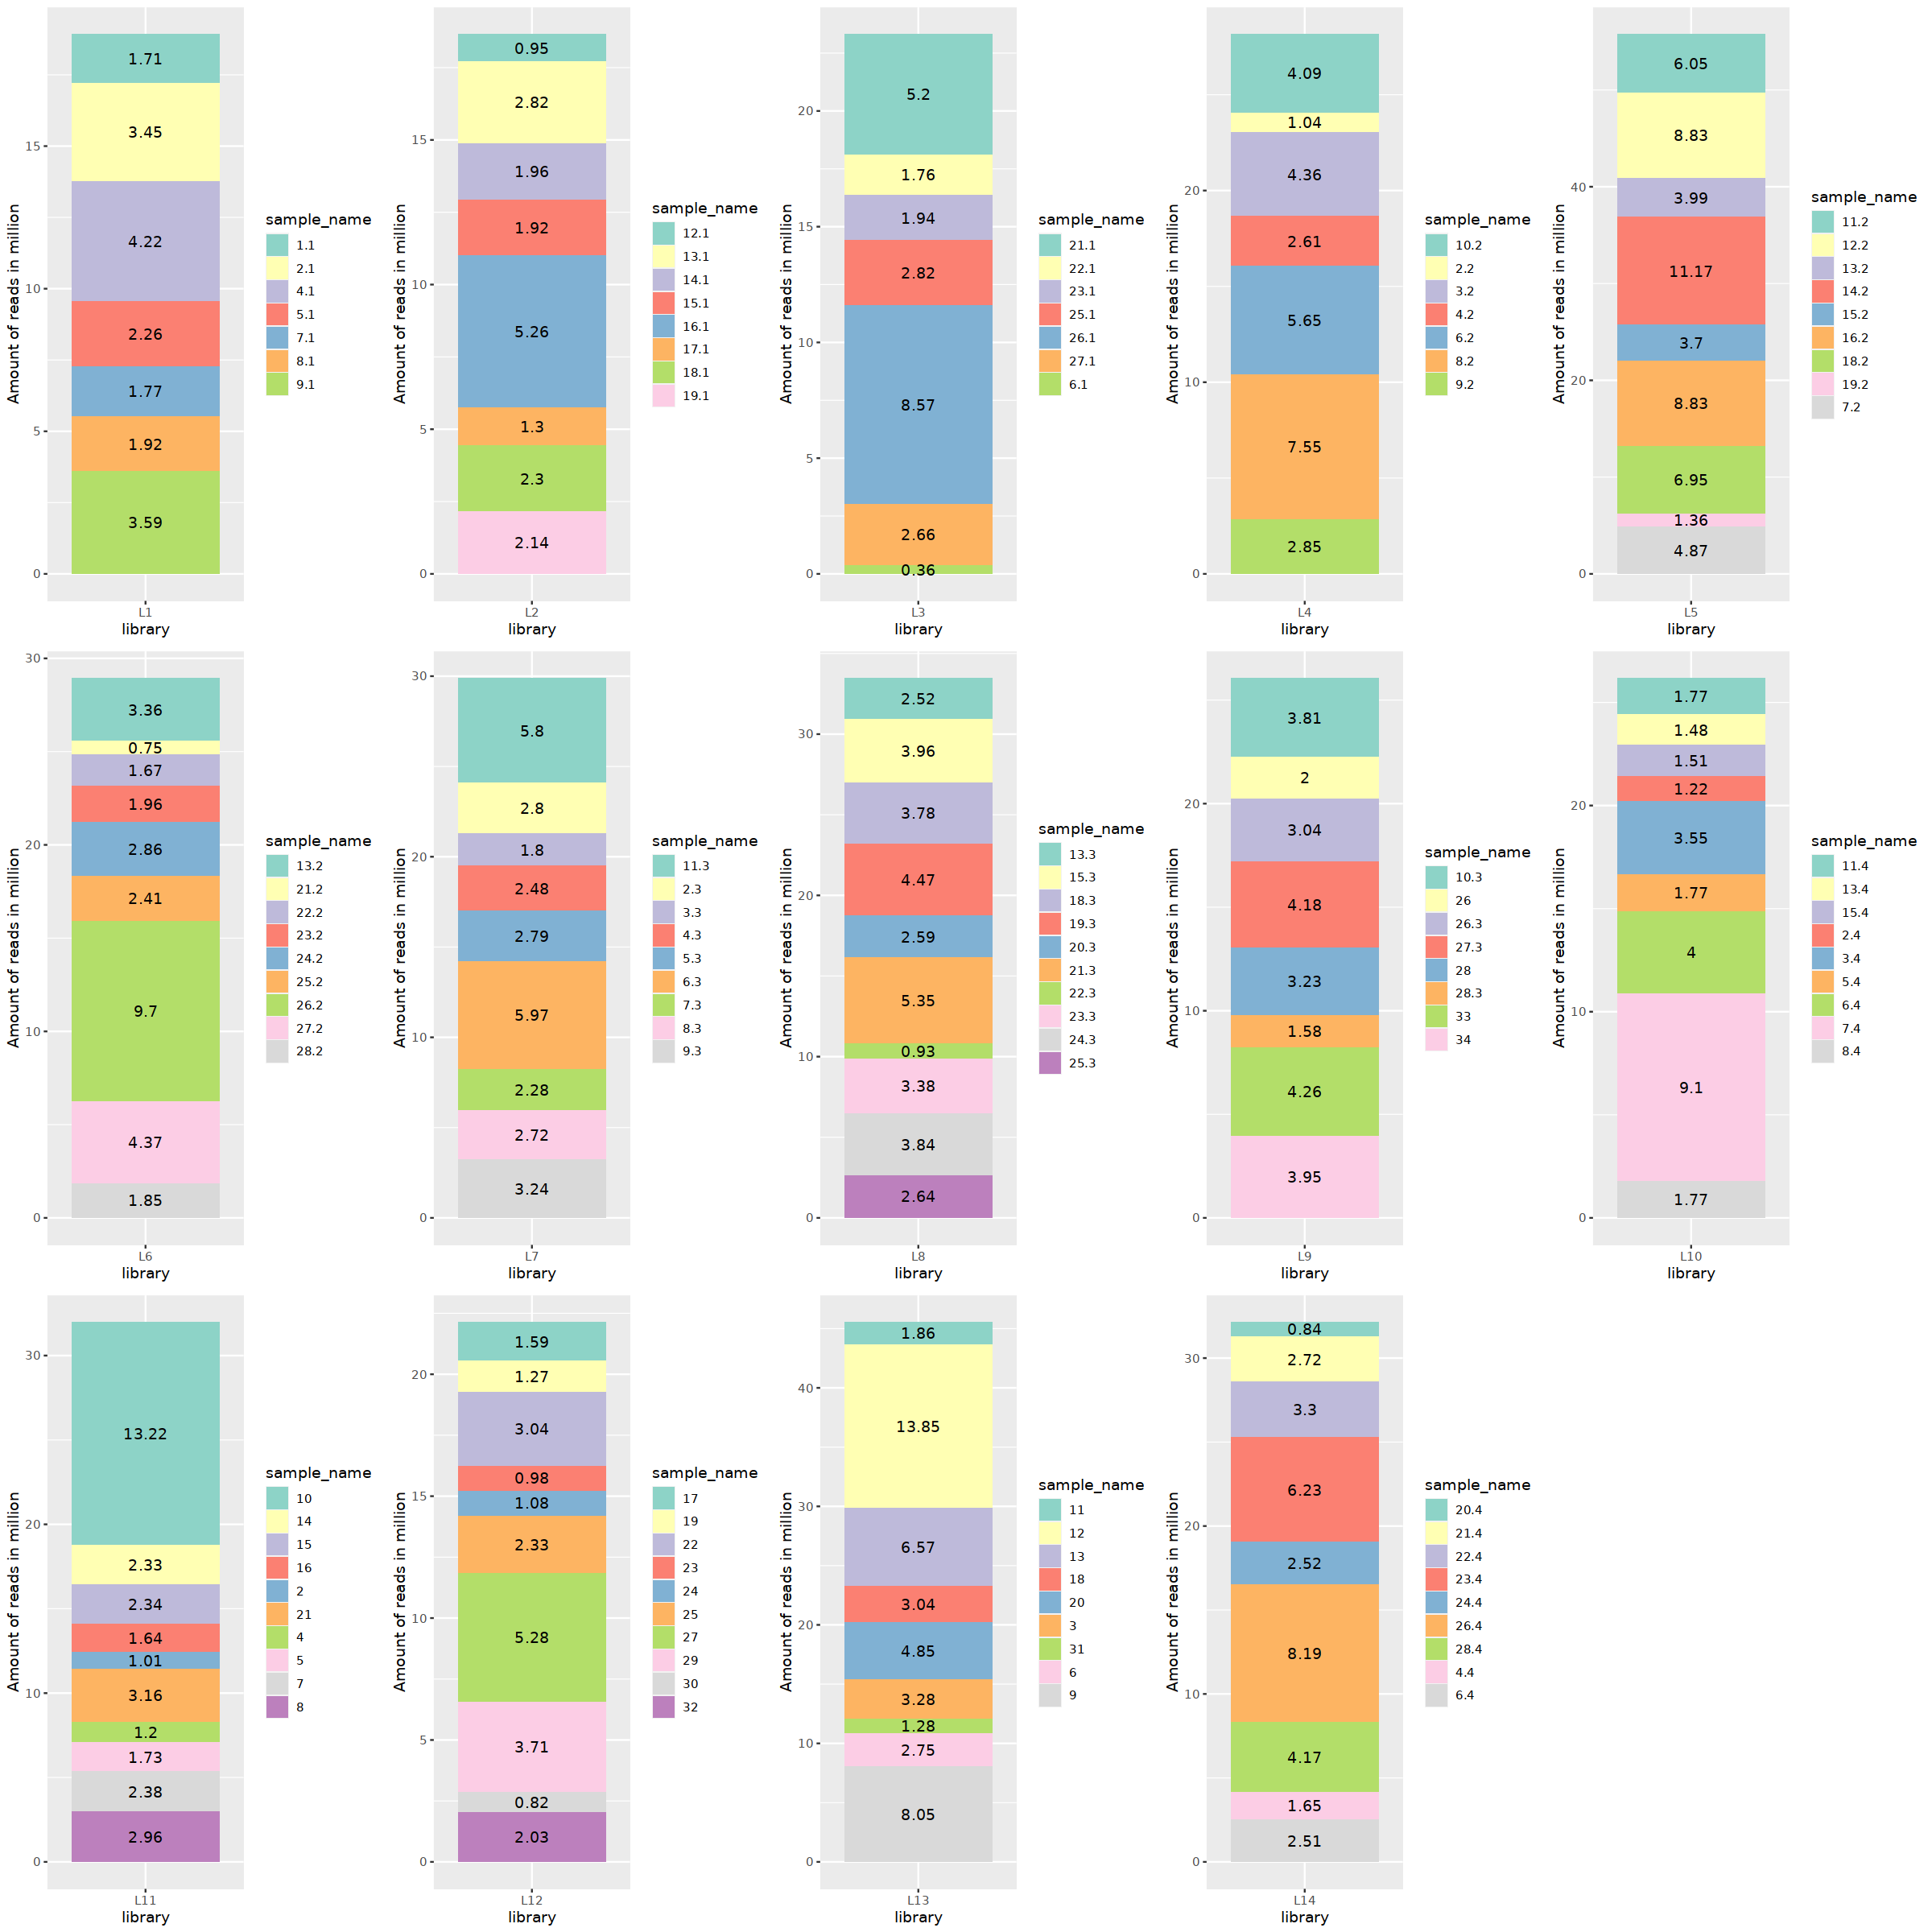

In [76]:
####### as stacked barchart for samples (only valid samples)

read_distribution_filtered = read_distribution_complete[read_distribution_complete$in_sample ==1, ]

read_distribution_filtered$amount_reads_in_m = round(read_distribution_filtered$amount_reads/1000000,2)
read_distribution_filtered$sample_name = read_distribution_filtered$display_name

plot_list = list()


for(i in libraries){
    plot_list[[i]] = ggplot(read_distribution_filtered[read_distribution_filtered$library==i,], aes(fill=sample_name, y=amount_reads_in_m, x=library, order=library, label = amount_reads_in_m)) + geom_bar(position="stack", stat="identity") + geom_text( size = 4, position = position_stack(vjust = 0.5)) +scale_fill_brewer(palette = "Set3") + ylab ('Amount of reads in million')
    }
options(repr.plot.width=20, repr.plot.height=20)
grid.arrange(plot_list[[1]], plot_list[[2]],plot_list[[3]],plot_list[[4]],plot_list[[5]],plot_list[[6]],plot_list[[7]],plot_list[[8]], plot_list[[9]],plot_list[[10]],plot_list[[11]],plot_list[[12]],plot_list[[13]], plot_list[[14]], ncol=5, nrow = 3) 


## Analyze read distribution for extreme low reads

In [77]:
get_counts_threshold = function (x){
    names(x[colSums(x) < 1000000])}

In [78]:
samples_less_than_1M_counts = lapply(protein_list, get_counts_threshold)

In [79]:
samples_less_than_1M_counts

$L1
[1] "S3"   "6.1"  "10.1"

$L2
[1] "12.1"

$L3
[1] "6.1"

$L4
[1] "S1" "S5" "S7"

$L5
[1] "20.2"

$L6
[1] "21.2" "S9"  

$L7
[1] "S10"

$L8
[1] "22.3"

$L9
[1] "S9"  "S10"

$L10
[1] "S3"

$L11
character(0)

$L12
[1] "Ch.CCS.23" "Ch.CCS.30"

$L13
[1] "No.CCS.1"

$L14
[1] "20.4" "S10"

In [80]:
samples_less_than_1M_counts_vec = unlist(samples_less_than_1M_counts)

In [81]:
valid_samples = library_hashtag_mapping[library_hashtag_mapping$in_sample ==1, ]
valid_samples = valid_samples$name

In [82]:
valid_samples

[1] "1.1"       "2.1"       "4.1"       "5.1"       "7.1"       "8.1"      
  [7] "9.1"       "12.1"      "13.1"      "14.1"      "15.1"      "16.1"     
 [13] "17.1"      "18.1"      "19.1"      "21.1"      "22.1"      "23.1"     
 [19] "25.1"      "26.1"      "27.1"      "6.1"       "2.2"       "3.2"      
 [25] "4.2"       "6.2"       "8.2"       "9.2"       "10.2"      "11.2"     
 [31] "12.2"      "13.2"      "14.2"      "15.2"      "16.2"      "7.2"      
 [37] "18.2"      "19.2"      "21.2"      "22.2"      "23.2"      "24.2"     
 [43] "25.2"      "26.2"      "27.2"      "28.2"      "13.2"      "11.3"     
 [49] "2.3"       "3.3"       "4.3"       "5.3"       "6.3"       "7.3"      
 [55] "8.3"       "9.3"       "13.3"      "15.3"      "18.3"      "19.3"     
 [61] "20.3"      "21.3"      "22.3"      "23.3"      "24.3"      "25.3"     
 [67] "26.3"      "27.3"      "28.3"      "26"        "28"        "33"       
 [73] "34"        "10.3"      "2.4"       "3.4"       "5.4"       "6.4"      
 [79] "7.4"       "8.4"       "11.4"      "13.4"      "15.4"      "Ch.CCS.2" 
 [85] "Ch.CCS.4"  "Ch.CCS.5"  "Ch.CCS.7"  "Ch.CCS.8"  "Ch.CCS.10" "Ch.CCS.14"
 [91] "Ch.CCS.15" "Ch.CCS.16" "Ch.CCS.21" "Ch.CCS.22" "Ch.CCS.23" "Ch.CCS.27"
 [97] "Ch.CCS.29" "Ch.CCS.30" "Ch.CCS.32" "C.CCS.17"  "C.CCS.19"  "C.CCS.24" 
[103] "C.CCS.25"  "No.CCS.3"  "No.CCS.6"  "No.CCS.9"  "No.CCS.11" "No.CCS.12"
[109] "No.CCS.13" "No.CCS.18" "No.CCS.20" "No.CCS.31" "20.4"      "21.4"     
[115] "22.4"      "23.4"      "24.4"      "26.4"      "28.4"      "4.4"      
[121] "6.4"

In [83]:
invalid_samples = library_hashtag_mapping[library_hashtag_mapping$in_sample ==0, ]
invalid_samples = invalid_samples$name
invalid_samples

[1] "S3"       "6.1"      "10.1"     "S1"       "S5"       "S7"      
 [7] "20.2"     "S9"       "S10"      "S9"       "S10"      "S3"      
[13] "No.CCS.1" "S10"

In [84]:
###### Check out if more than 1 M counts for all valid samples

setdiff(samples_less_than_1M_counts_vec , invalid_samples)



[1] "12.1"      "21.2"      "22.3"      "Ch.CCS.23" "Ch.CCS.30" "20.4"

In [85]:
########### Check out libraries that have less than 1M counts but are valid